## 时间序列 time series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,6))

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

np.random.seed(12345) # 生成指定随机数，一次性

## Date and Time Data Types and Tools

In [11]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2020, 6, 7)

In [14]:
delta = datetime(2011,1,1) - datetime(2010,1,1,8,15)
delta
delta.days
delta.seconds

56700

In [16]:
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [20]:
stamp = datetime(2011,1,15)
stamp
str(stamp)
datetime.strftime(stamp,'%Y-%m-%d')
stamp.strftime('%Y-%m-%d')

'2011-01-15'

In [22]:
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datestr = ['7/6/2011','8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestr]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [31]:
from dateutil.parser import parse
parse('2011-02-23')
parse('jan 31, 1995 10:45 PM')
parse('6/12/2011',dayfirst=True) # 日在前

datetime.datetime(2011, 12, 6, 0, 0)

In [32]:
datestrs = ['2011-05-12 12:00:00', '2011-05-12 12:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-05-12 12:00:00', '2011-05-12 12:00:00'], dtype='datetime64[ns]', freq=None)

In [42]:
idx = pd.to_datetime(datestr + [None])
idx
idx[2]
pd.isnull(idx)
idx.isnull()

array([False, False,  True])

## Time Series Basics

In [96]:
from datetime import datetime
dates = [datetime(2011, 1, 12), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 13)]
dates
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-12   -2.077403
2011-01-05    0.422648
2011-01-07    2.001614
2011-01-08    1.385914
2011-01-10   -1.104685
2011-01-13    0.677098
dtype: float64

In [50]:
ts.index
ts.index[1]

Timestamp('2011-01-05 00:00:00')

In [76]:
ts[datetime(2011, 1, 7)]
ts['20110107']
ts['1/6/2011':'1/11/2011']

2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
dtype: float64

In [98]:
ts = ts.sort_index()
ts

2011-01-05    0.422648
2011-01-07    2.001614
2011-01-08    1.385914
2011-01-10   -1.104685
2011-01-12   -2.077403
2011-01-13    0.677098
dtype: float64

In [99]:
ts.truncate(after=datetime(2011, 1, 10))

2011-01-05    0.422648
2011-01-07    2.001614
2011-01-08    1.385914
2011-01-10   -1.104685
dtype: float64

In [55]:
ts[::2]

2011-01-12    0.092908
2011-01-07    0.769023
2011-01-10    1.007189
dtype: float64

In [56]:
ts + ts[::2]

2011-01-05         NaN
2011-01-07    1.538045
2011-01-08         NaN
2011-01-10    2.014379
2011-01-12    0.185816
2011-01-13         NaN
dtype: float64

In [57]:
ts.index.dtype

dtype('<M8[ns]')

In [59]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-12 00:00:00')

## Indexing, Selection, Subsetting

In [63]:
stamp = ts.index[2]
stamp
ts[stamp]

0.7690225676118387

In [65]:
ts['1/10/2011']
ts['20110110']

2011-01-10    1.007189
dtype: float64

In [67]:
dateindex = pd.date_range('1/1/2000',periods=1000)
long_ts = pd.Series(np.random.randn(1000),index=dateindex)
long_ts
long_ts['2001']

2001-01-01   -0.171724
2001-01-02   -0.827840
2001-01-03    0.370548
2001-01-04   -0.674167
2001-01-05   -1.712340
                ...   
2001-12-27   -0.880247
2001-12-28   -0.376872
2001-12-29   -1.157682
2001-12-30   -0.125632
2001-12-31   -1.402235
Freq: D, Length: 365, dtype: float64

In [68]:
long_ts['2001-12']

2001-12-01   -0.973899
2001-12-02    0.908732
2001-12-03   -0.509226
2001-12-04   -1.023400
2001-12-05   -0.412273
                ...   
2001-12-27   -0.880247
2001-12-28   -0.376872
2001-12-29   -1.157682
2001-12-30   -0.125632
2001-12-31   -1.402235
Freq: D, Length: 31, dtype: float64

In [102]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York','Ohio'])
long_df.loc['05-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.949803,-0.491644,0.332801,-0.271341
2001-05-09,1.211292,1.435495,-0.705894,-0.205447
2001-05-16,-0.544861,0.777923,0.685195,-2.140710
2001-05-23,-1.663263,0.771936,0.356606,0.417996
2001-05-30,-0.160353,0.920638,0.765361,0.944248


## Time Series with Duplicate Indices


In [103]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [108]:
dup_ts.index.is_unique

False

In [109]:
dup_ts['1/3/2000'] # not duplicated

4

In [110]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [117]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges,Frequencies, and Shifting

In [118]:
ts

2011-01-05    0.422648
2011-01-07    2.001614
2011-01-08    1.385914
2011-01-10   -1.104685
2011-01-12   -2.077403
2011-01-13    0.677098
dtype: float64

In [120]:
resampler = ts.resample('D')
resampler

### Generating Date Ranges

In [123]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [124]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [125]:
pd.date_range(end='2012-04-01', periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [126]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [127]:
pd.date_range('2012-05-02 12:45:32', periods=5)

DatetimeIndex(['2012-05-02 12:45:32', '2012-05-03 12:45:32',
               '2012-05-04 12:45:32', '2012-05-05 12:45:32',
               '2012-05-06 12:45:32'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2012-05-02 12:45:32', periods=5, normalize=True)

### Frequencies and Date Offsets

In [128]:
from pandas.tseries.offsets import Hour,Minute
hour = Hour()
hour

<Hour>

In [129]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [130]:
pd.date_range('2000-01-01', '2020-01-03', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2020-01-01 12:00:00', '2020-01-01 16:00:00',
               '2020-01-01 20:00:00', '2020-01-02 00:00:00',
               '2020-01-02 04:00:00', '2020-01-02 08:00:00',
               '2020-01-02 12:00:00', '2020-01-02 16:00:00',
               '2020-01-02 20:00:00', '2020-01-03 00:00:00'],
              dtype='datetime64[ns]', length=43843, freq='4H')

In [131]:
pd.date_range('2000-01-01', '2020-01-03', freq=four_hour)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2020-01-01 12:00:00', '2020-01-01 16:00:00',
               '2020-01-01 20:00:00', '2020-01-02 00:00:00',
               '2020-01-02 04:00:00', '2020-01-02 08:00:00',
               '2020-01-02 12:00:00', '2020-01-02 16:00:00',
               '2020-01-02 20:00:00', '2020-01-03 00:00:00'],
              dtype='datetime64[ns]', length=43843, freq='4H')

In [132]:
Hour(2) + Minute(30)

<150 * Minutes>

In [133]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates

In [3]:
# 月中某星期五 WOM= Week of month
rng = pd.date_range('2012-01-01','2012-09-01', freq='WOM-1FRI')
rng
list(rng)

[Timestamp('2012-01-06 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-02-03 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-03-02 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-04-06 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-05-04 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-06-01 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-07-06 00:00:00', freq='WOM-1FRI'),
 Timestamp('2012-08-03 00:00:00', freq='WOM-1FRI')]

### Shifting(Leading and Lagging) Data

In [5]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31    1.965781
2000-02-29    1.393406
2000-03-31    0.092908
2000-04-30    0.281746
Freq: M, dtype: float64

In [6]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.965781
2000-04-30    1.393406
Freq: M, dtype: float64

In [7]:
ts.shift(-2)

2000-01-31    0.092908
2000-02-29    0.281746
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [8]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.291169
2000-03-31   -0.933323
2000-04-30    2.032532
Freq: M, dtype: float64

In [9]:
ts.shift(2,freq='M')

2000-03-31    1.965781
2000-04-30    1.393406
2000-05-31    0.092908
2000-06-30    0.281746
Freq: M, dtype: float64

In [11]:
ts.shift(3,freq='D')
ts.shift(1,freq='90T')

2000-01-31 01:30:00    1.965781
2000-02-29 01:30:00    1.393406
2000-03-31 01:30:00    0.092908
2000-04-30 01:30:00    0.281746
Freq: M, dtype: float64

### shifting dates with offsets

In [16]:
from datetime import datetime
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011,11,17)
now + 3 * Day()
now + 3 * MonthEnd(2)

Timestamp('2012-04-30 00:00:00')

In [18]:
now
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [24]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.652469
2000-01-19   -1.218302
2000-01-23   -1.332610
2000-01-27    1.074623
2000-01-31    0.723642
2000-02-04    0.690002
2000-02-08    1.001543
2000-02-12   -0.503087
2000-02-16   -0.622274
2000-02-20   -0.921169
2000-02-24   -0.726213
2000-02-28    0.222896
2000-03-03    0.051316
2000-03-07   -1.157719
2000-03-11    0.816707
2000-03-15    0.433610
2000-03-19    1.010737
2000-03-23    1.824875
2000-03-27   -0.997518
2000-03-31    0.850591
Freq: 4D, dtype: float64

In [25]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.281023
2000-02-29   -0.122615
2000-03-31    0.354075
dtype: float64

In [26]:
ts.resample('M').mean()

2000-01-31   -0.281023
2000-02-29   -0.122615
2000-03-31    0.354075
Freq: M, dtype: float64

### Time Zone Handling

In [28]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [29]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [30]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.131578
2012-03-10 09:30:00    0.912414
2012-03-11 09:30:00    0.188211
2012-03-12 09:30:00    2.169461
2012-03-13 09:30:00   -0.114928
2012-03-14 09:30:00    2.003697
Freq: D, dtype: float64

In [35]:
print(ts.index.tz)

None


In [36]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [39]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [40]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.131578
2012-03-10 04:30:00-05:00    0.912414
2012-03-11 05:30:00-04:00    0.188211
2012-03-12 05:30:00-04:00    2.169461
2012-03-13 05:30:00-04:00   -0.114928
2012-03-14 05:30:00-04:00    2.003697
Freq: D, dtype: float64

In [45]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.index
ts_eastern = ts_eastern.tz_convert('UTC')
ts_eastern.index
ts_eastern = ts_eastern.tz_convert('Europe/Berlin')
ts_eastern.index

DatetimeIndex(['2012-03-09 14:30:00+00:00', '2012-03-10 14:30:00+00:00',
               '2012-03-11 13:30:00+00:00', '2012-03-12 13:30:00+00:00',
               '2012-03-13 13:30:00+00:00', '2012-03-14 13:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [46]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone-Aware TimeStamp Objects

In [113]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [50]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [51]:
stamp_utc.value

1299902400000000000

In [52]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [56]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-03-12 03:30:00-0400', tz='US/Eastern')

### Operations Between Different Time Zones

In [63]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.204708
2012-03-08 09:30:00    0.478943
2012-03-09 09:30:00   -0.519439
2012-03-12 09:30:00   -0.555730
2012-03-13 09:30:00    1.965781
2012-03-14 09:30:00    1.393406
2012-03-15 09:30:00    0.092908
2012-03-16 09:30:00    0.281746
2012-03-19 09:30:00    0.769023
2012-03-20 09:30:00    1.246435
Freq: B, dtype: float64

In [64]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.204708
2012-03-08 09:30:00+00:00    0.478943
2012-03-09 09:30:00+00:00   -0.519439
2012-03-12 09:30:00+00:00   -0.555730
2012-03-13 09:30:00+00:00    1.965781
2012-03-14 09:30:00+00:00    1.393406
2012-03-15 09:30:00+00:00    0.092908
Freq: B, dtype: float64

In [65]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.519439
2012-03-12 13:30:00+04:00   -0.555730
2012-03-13 13:30:00+04:00    1.965781
2012-03-14 13:30:00+04:00    1.393406
2012-03-15 13:30:00+04:00    0.092908
Freq: B, dtype: float64

In [67]:
# 转为utc
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [71]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [72]:
p + 5

Period('2012', 'A-DEC')

In [73]:
pd.Period('2013', freq='A-DEC') - p

<6 * YearEnds: month=12>

In [74]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng


PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [75]:
pd.Series(np.random.randn(6), index=rng)

2000-01    1.007189
2000-02   -1.296221
2000-03    0.274992
2000-04    0.228913
2000-05    1.352917
2000-06    0.886429
Freq: M, dtype: float64

In [76]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [89]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [90]:
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [99]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [101]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01    1.965781
2007-01    1.393406
2008-01    0.092908
2009-01    0.281746
Freq: M, dtype: float64

In [106]:
ts.asfreq('B', how='start')
ts.asfreq('B', how='end')

2006-12-29    1.965781
2007-12-31    1.393406
2008-12-31    0.092908
2009-12-31    0.281746
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [107]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [109]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [121]:
p4pm = (p.asfreq('B', how = 'E') - 1).asfreq('T','S') +16 * 60
p4pm
p4pm.to_timestamp()

Period('2012-01-30 16:00', 'T')

In [125]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [126]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [128]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

2000-01    0.769023
2000-02    1.246435
2000-03    1.007189
Freq: M, dtype: float64

In [129]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

2000-01   -1.296221
2000-01    0.274992
2000-01    0.228913
2000-02    1.352917
2000-02    0.886429
2000-02   -2.001637
Freq: M, dtype: float64

In [132]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -1.296221
2000-01-30 23:59:59.999999999    0.274992
2000-01-31 23:59:59.999999999    0.228913
2000-02-01 23:59:59.999999999    1.352917
2000-02-02 23:59:59.999999999    0.886429
2000-02-03 23:59:59.999999999   -2.001637
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [137]:
data = pd.read_csv('/Users/joey/Documents/PycharmProjects/mywork/timeseries/macrodata.csv')
data.head(5)
data.year
data['quarter']

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [140]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index

In [143]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Resampling and Frequency Conversion

In [144]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.371843
2000-01-02    1.669025
2000-01-03   -0.438570
2000-01-04   -0.539741
2000-01-05    0.476985
                ...   
2000-04-05    0.929969
2000-04-06   -1.569271
2000-04-07   -1.022487
2000-04-08   -0.402827
2000-04-09    0.220487
Freq: D, Length: 100, dtype: float64

In [145]:
ts.resample('M').mean()

2000-01-31   -0.312244
2000-02-29    0.009400
2000-03-31    0.188229
2000-04-30   -0.102628
Freq: M, dtype: float64

In [149]:
ts.resample('M', kind = 'period').mean()
ts.resample('M', kind = 'timestamp').mean()

2000-01-31   -0.312244
2000-02-29    0.009400
2000-03-31    0.188229
2000-04-30   -0.102628
Freq: M, dtype: float64

### Downsampling

In [150]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [151]:
# 左开区间，右闭区间
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [153]:
ts.resample('4min',closed='left').sum()

2000-01-01 00:00:00     6
2000-01-01 00:04:00    22
2000-01-01 00:08:00    38
Freq: 4T, dtype: int64

In [154]:
# 右边数据标记
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [155]:
# 偏置时间戳
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling
开端 结束 最大值 最小值

In [157]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [2]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [7]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [8]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-07,-0.204708,0.478943,-0.519439,-0.555730
2000-01-08,-0.204708,0.478943,-0.519439,-0.555730
2000-01-09,-0.204708,0.478943,-0.519439,-0.555730
2000-01-10,-0.204708,0.478943,-0.519439,-0.555730
2000-01-11,-0.204708,0.478943,-0.519439,-0.555730
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [9]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-07,-0.204708,0.478943,-0.519439,-0.555730
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [16]:
# 无结果
a = frame.resample('W-THU').asfreq()
a.ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


In [17]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-13,1.965781,1.393406,0.092908,0.281746


### Resampling with Periods

In [21]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.204708,0.478943,-0.519439,-0.555730
2000-02,1.965781,1.393406,0.092908,0.281746
2000-03,0.769023,1.246435,1.007189,-1.296221
2000-04,0.274992,0.228913,1.352917,0.886429
2000-05,-2.001637,-0.371843,1.669025,-0.438570


In [22]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.634588,0.272220,0.279361,-0.273546
2001,0.062526,0.295386,0.096807,0.173018


In [25]:
# 只对时间的显示进行重采
frame[:5].asfreq('A-DEC')

,Colorado,Texas,New York,Ohio
2000,-0.204708,0.478943,-0.519439,-0.555730
2000,1.965781,1.393406,0.092908,0.281746
2000,0.769023,1.246435,1.007189,-1.296221
2000,0.274992,0.228913,1.352917,0.886429
2000,-2.001637,-0.371843,1.669025,-0.438570


In [26]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.634588,0.272220,0.279361,-0.273546
2000Q2,-0.634588,0.272220,0.279361,-0.273546
2000Q3,-0.634588,0.272220,0.279361,-0.273546
2000Q4,-0.634588,0.272220,0.279361,-0.273546
2001Q1,0.062526,0.295386,0.096807,0.173018
2001Q2,0.062526,0.295386,0.096807,0.173018
2001Q3,0.062526,0.295386,0.096807,0.173018
2001Q4,0.062526,0.295386,0.096807,0.173018


In [28]:
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,-0.634588,0.272220,0.279361,-0.273546
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.062526,0.295386,0.096807,0.173018
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [29]:
# convention最后一个开始
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.634588,0.272220,0.279361,-0.273546
2001Q1,-0.634588,0.272220,0.279361,-0.273546
2001Q2,-0.634588,0.272220,0.279361,-0.273546
2001Q3,-0.634588,0.272220,0.279361,-0.273546
2001Q4,0.062526,0.295386,0.096807,0.173018


In [30]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.634588,0.272220,0.279361,-0.273546
2001Q1,-0.634588,0.272220,0.279361,-0.273546
2001Q2,-0.634588,0.272220,0.279361,-0.273546
2001Q3,-0.634588,0.272220,0.279361,-0.273546
2001Q4,0.062526,0.295386,0.096807,0.173018
2002Q1,0.062526,0.295386,0.096807,0.173018
2002Q2,0.062526,0.295386,0.096807,0.173018
2002Q3,0.062526,0.295386,0.096807,0.173018


## Moving Window Functions

In [3]:
close_px_all = pd.read_csv('/Users/joey/Documents/PycharmProjects/mywork/timeseries/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


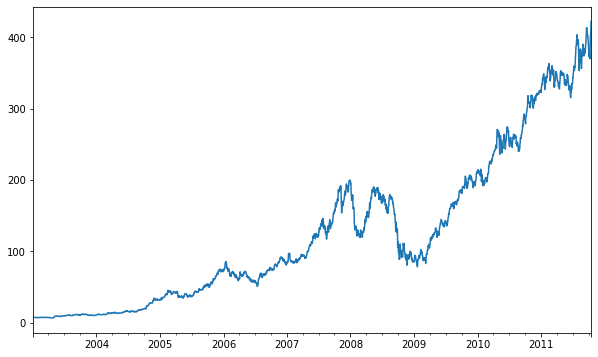

In [4]:
close_px['AAPL'].plot()

In [34]:
close_px.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

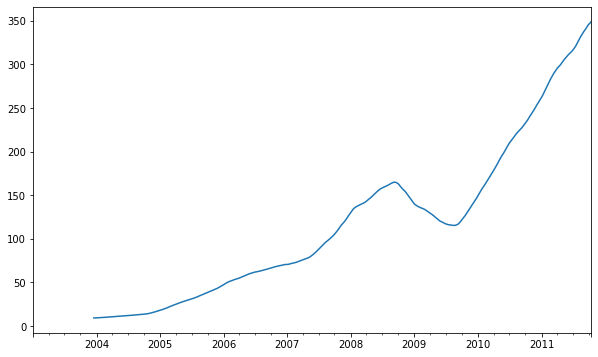

In [6]:
close_px.AAPL.rolling(250).mean().plot()

In [7]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [18]:

appl_std250 = close_px.AAPL.rolling(250,min_periods=2).std()
appl_std250[:50]

2003-01-02         NaN
2003-01-03    0.035355
2003-01-06    0.028868
2003-01-07    0.023629
2003-01-08    0.071204
                ...   
2003-03-06    0.158529
2003-03-07    0.156828
2003-03-10    0.155832
2003-03-11    0.156073
2003-03-12    0.156231
Freq: B, Name: AAPL, Length: 50, dtype: float64

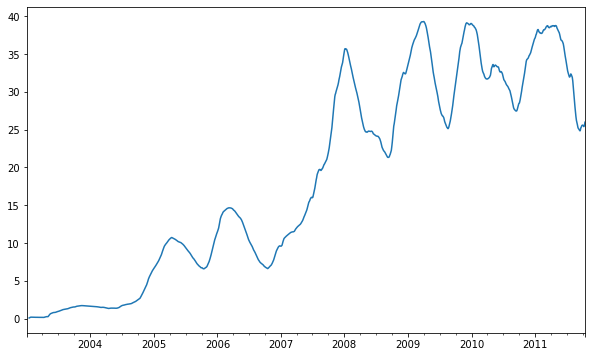

In [11]:
appl_std250.plot()

In [25]:
expanding_std = appl_std250.expanding().std()
expanding_std

2003-01-02          NaN
2003-01-03          NaN
2003-01-06     0.004588
2003-01-07     0.005874
2003-01-08     0.021502
                ...    
2011-10-10    13.399942
2011-10-11    13.397827
2011-10-12    13.395736
2011-10-13    13.393677
2011-10-14    13.391676
Freq: B, Name: AAPL, Length: 2292, dtype: float64

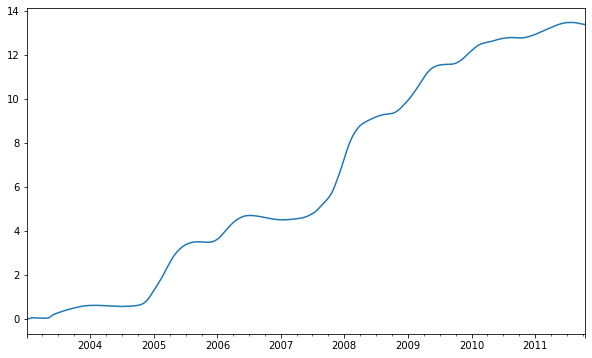

In [27]:
expanding_std.plot()

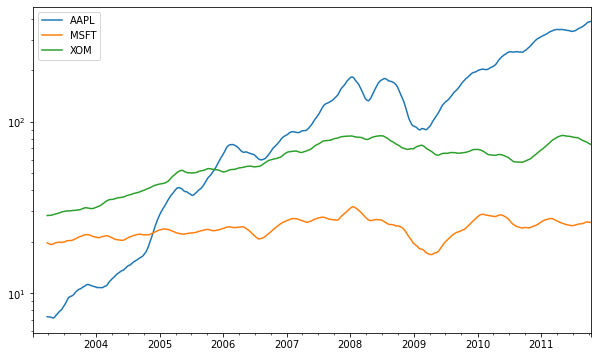

In [23]:
close_px.rolling(60).mean().plot(logy=True)

In [30]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [38]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

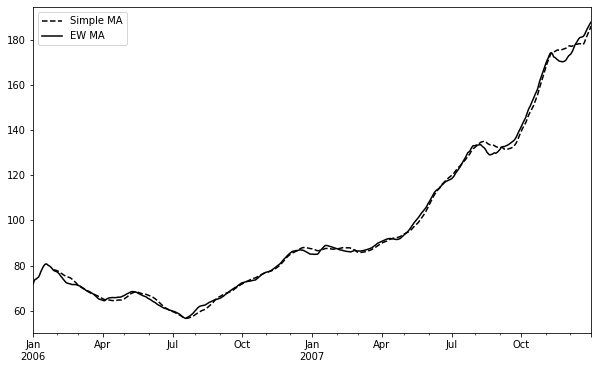

In [39]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [40]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [41]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

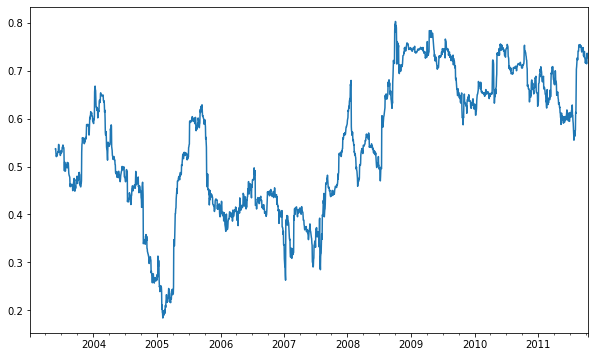

In [42]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [43]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

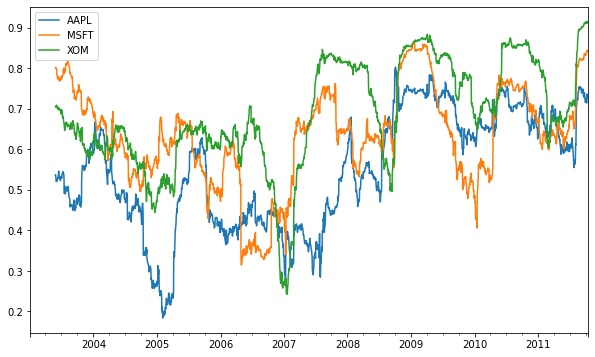

In [44]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [45]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

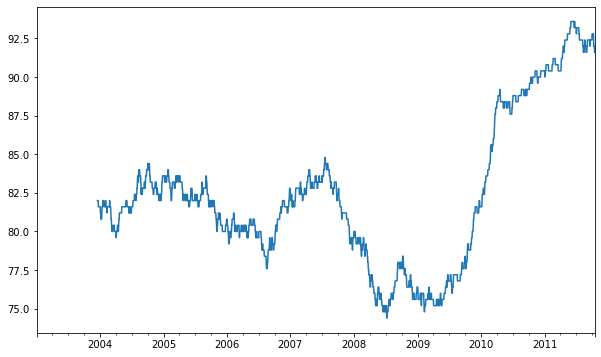

In [46]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [47]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

In [48]:
pd.options.display.max_rows

60

In [49]:
PREVIOUS_MAX_ROWS

60